In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_style("whitegrid")

In [2]:
results_directory = Path('../pca-results')
# Return a list of regular files only, not directories
file_list = [f for f in results_directory.glob('*') if f.is_file() and f.suffix == '.csv']

rows = []
for file in file_list:
  nc = int(file.name.replace('.csv', '').replace('nc', ''))
  row = pd.read_csv(file, header=1).drop('0', axis='columns')
  row['nc'] = pd.Series([nc])
  rows.append(row)

df = pd.concat(rows).sort_values('nc').reset_index(drop=True)
df.head()

,mag-f1,mesh-f1,co-view-map,co-view-ndcg,co-read-map,co-read-ndcg,cite-map,cite-ndcg,co-cite-map,co-cite-ndcg,recomm-adj-NDCG,recomm-adj-P@1,nc
0,42.17,15.96,77.36,88.08,76.48,87.52,80.07,89.84,80.16,90.13,52.30,17.70,5
1,58.42,34.46,80.22,89.69,79.84,89.68,83.42,92.26,83.92,92.30,53.28,19.46,10
2,70.01,50.34,82.45,90.92,82.69,91.40,86.02,93.65,86.55,93.84,53.22,19.52,20
3,73.91,63.29,82.71,91.07,83.24,91.69,86.20,93.73,87.14,94.19,53.42,19.62,30
4,75.00,71.49,82.93,91.17,83.64,91.92,86.60,93.92,87.37,94.29,53.55,20.23,40


In [3]:
df['cls'] = (df['mesh-f1'] + df['mag-f1'])/2
df['user-activity'] = (df['co-cite-map'] + df['co-cite-ndcg'] + df['co-read-map'] + df['co-read-ndcg'] + df['cite-map'] + df['cite-ndcg'] + df['co-cite-map'] + df['co-cite-ndcg'])/8
df['recomm'] = (df['recomm-adj-NDCG'] + df['recomm-adj-P@1'])/2
df

,mag-f1,mesh-f1,co-view-map,co-view-ndcg,co-read-map,co-read-ndcg,cite-map,cite-ndcg,co-cite-map,co-cite-ndcg,recomm-adj-NDCG,recomm-adj-P@1,nc,cls,user-activity,recomm
0,42.17,15.96,77.36,88.08,76.48,87.52,80.07,89.84,80.16,90.13,52.30,17.70,5,29.065,84.31125,35.000
1,58.42,34.46,80.22,89.69,79.84,89.68,83.42,92.26,83.92,92.30,53.28,19.46,10,46.440,87.20500,36.370
2,70.01,50.34,82.45,90.92,82.69,91.40,86.02,93.65,86.55,93.84,53.22,19.52,20,60.175,89.31750,36.370
3,73.91,63.29,82.71,91.07,83.24,91.69,86.20,93.73,87.14,94.19,53.42,19.62,30,68.600,89.69000,36.520
4,75.00,71.49,82.93,91.17,83.64,91.92,86.60,93.92,87.37,94.29,53.55,20.23,40,73.245,89.92500,36.890
5,76.38,75.54,83.17,91.31,83.94,92.08,86.89,94.07,87.49,94.35,53.33,19.41,50,75.960,90.08250,36.370
6,77.48,79.97,83.42,91.42,84.23,92.26,87.34,94.36,87.78,94.57,53.47,19.42,75,78.725,90.36125,36.445
7,79.18,83.14,83.54,91.45,84.38,92.35,87.69,94.53,87.97,94.68,53.48,19.46,100,81.160,90.53125,36.470
8,79.71,83.63,83.53,91.46,84.46,92.40,87.91,94.66,88.14,94.80,53.82,19.60,150,81.670,90.66375,36.710
9,80.10,84.14,83.63,91.51,84.46,92.37,88.18,94.78,88.18,94.81,53.97,20.12,200,82.120,90.72125,37.045


c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

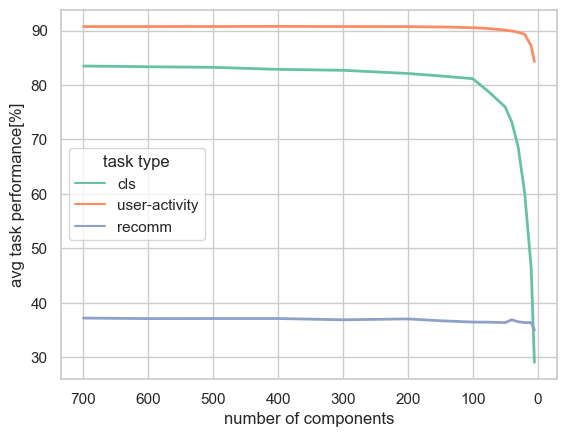

In [8]:
display_df = df[['cls', 'user-activity', 'recomm', 'nc']]
ax = sns.lineplot(x='nc', y='value', hue='task type', 
             data=pd.melt(display_df, ['nc'], var_name='task type'),
             palette=sns.palettes.color_palette('Set2'),
             linewidth=2)
plt.xlabel('number of components')
plt.ylabel('avg task performance[%]')
ax.invert_xaxis()